<center><h1>Homework 1</h1></center>
<br>
    <span>Name : Vasundhara Singh</span>
    <br>
    <span>GitHubUserName : vasu1406</span>
    <br>
    <span>USC ID : 7421414643</span>
    

### (a) Download Data

Package imports

In [27]:
import pandas as pd
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Get the Vertebral Column Data Set

In [28]:
# QUESTION PART a
# Download and Read Vertebral Column Data Set

ourData = arff.loadarff('../data/vertebral_column_data/column_2C_weka.arff')
dataframe = pd.DataFrame(ourData[0])
# dataframe

In [29]:
dataframe['class'].value_counts()

b'Abnormal'    210
b'Normal'      100
Name: class, dtype: int64

In [30]:
# Changing class = Abnormal to class 1 and class = Normal to class 0

columns=dataframe.columns[:-1]
dataframe['class'] = np.where(dataframe['class'] == b'Abnormal', 1,0)
# dataframe

### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

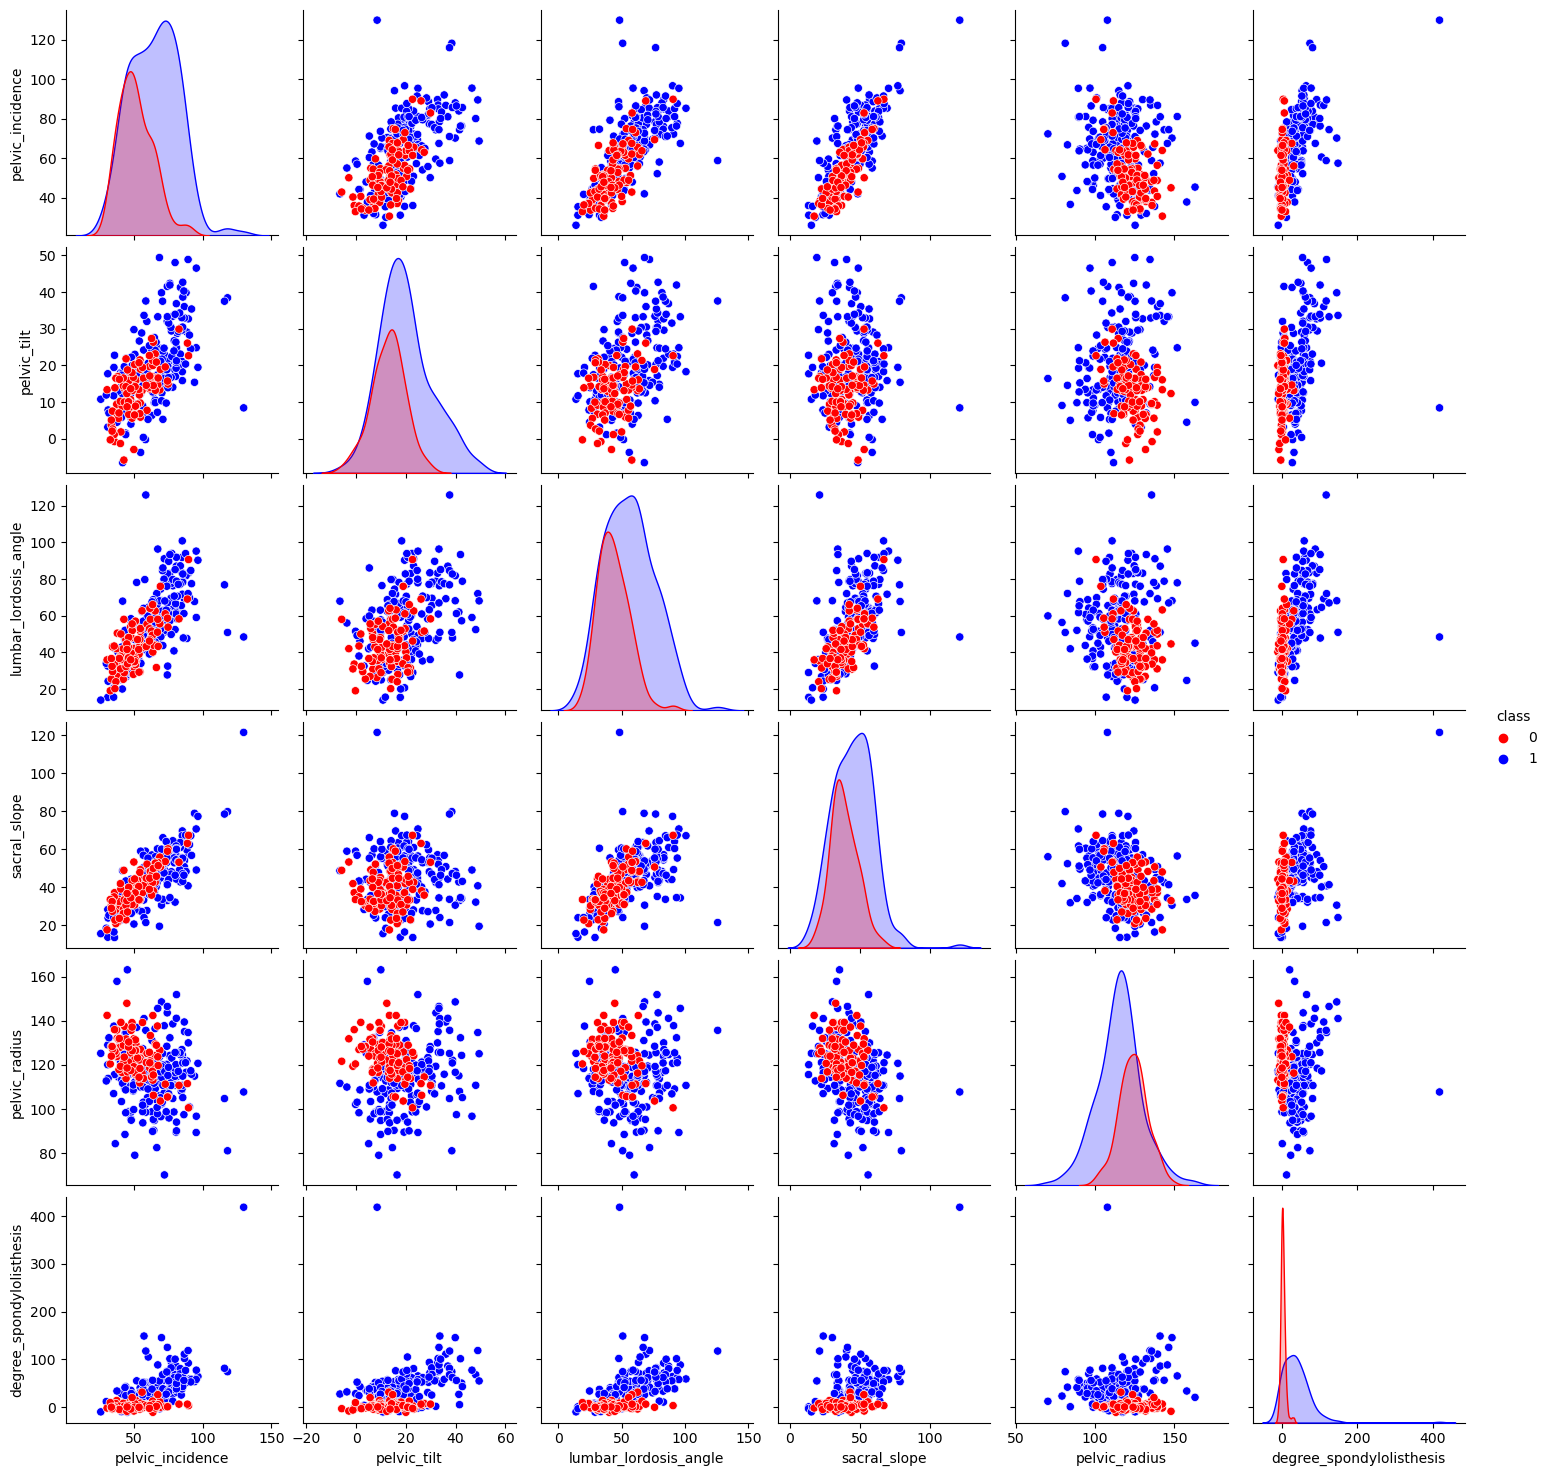

In [31]:
#Pre-Processing and Exploratory data analysis:
# Question Part b i

sns.pairplot(dataframe,hue='class',palette=["red", "blue"])
plt.show()

#### ii. Boxplots

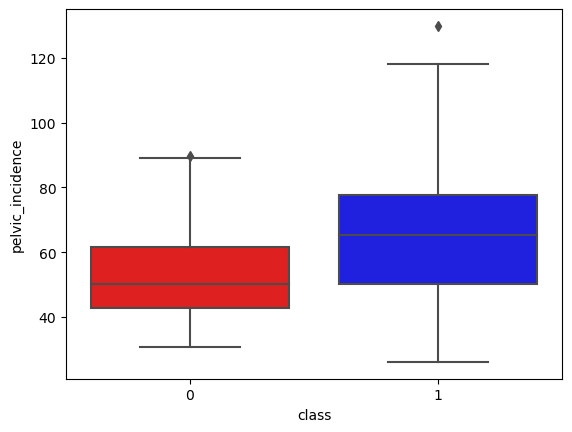

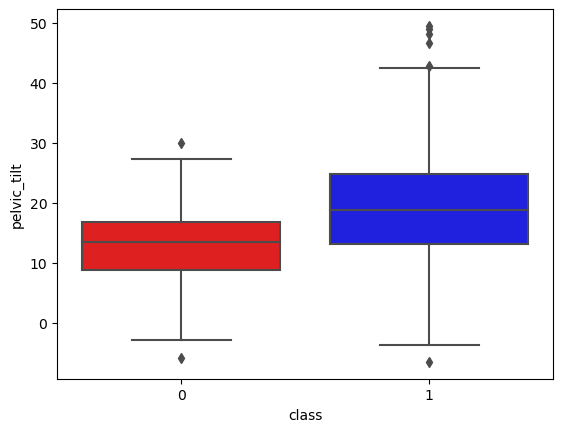

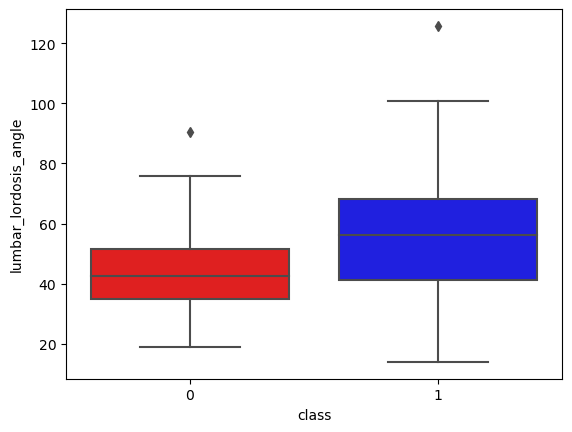

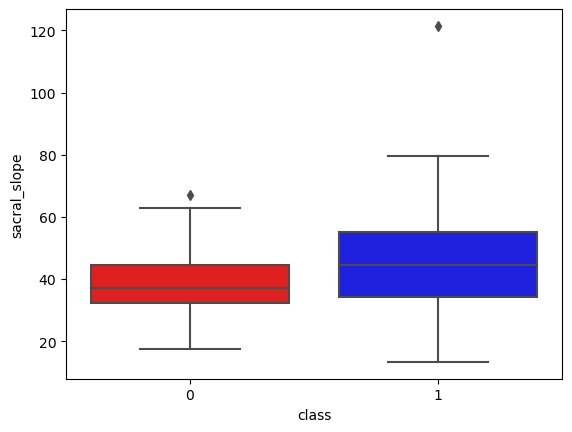

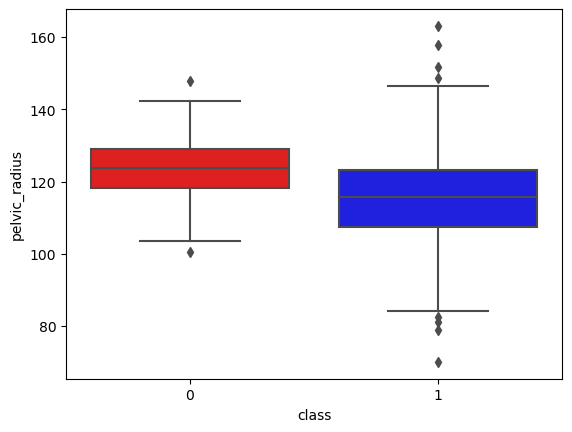

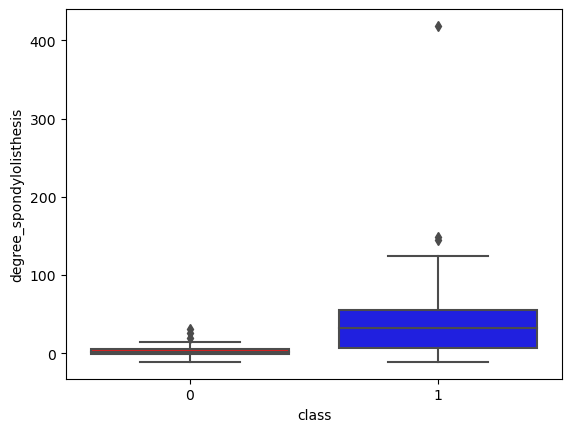

In [32]:
#Pre-Processing and Exploratory data analysis:
# Question Part b ii

columns=dataframe.columns[:-1]
for column in columns:
    sns.boxplot(x='class', y=column, data = dataframe, palette=["red", "blue"])
    plt.show()

#### iii. Split Data Set

In [33]:
#Pre-Processing and Exploratory data analysis:
# Question Part b iii
# Select the first 70 rows of Class 0 and 140 rows of Class 1 for training Set

df1 = dataframe[dataframe['class'] == 0]
df2 = dataframe[dataframe['class'] == 1]

frames = [df1.head(70),df2.head(140)]
trainingSet = pd.concat(frames)
# trainingSet

In [34]:
#Pre-Processing and Exploratory data analysis:
# Question Part b iii
# Setting Test Data

testSetFrames = [df1.iloc[70:],df2.iloc[140:]]
testSet = pd.concat(testSetFrames)
# testSet

### (c) Classification

#### i. Euclidean Metric

In [35]:
# Test and Train Data for kNN

trainingX = trainingSet.iloc[:,:-1]
trainingY = trainingSet['class']
testX = testSet.iloc[:,:-1]
testY = testSet['class']

In [36]:
# Classification using KNN on Vertebral Column Data Set:
# Question Part c i
# k-nearest neighbors with Euclidean metric

from sklearn.metrics import accuracy_score
import warnings
from sklearn.neighbors import KNeighborsClassifier as KClassifier
from scipy import stats

warnings.filterwarnings("ignore")
errorMapTest = dict()
errorMapTrain = dict()

for k in range(208,1 + (-3),-3):
    
    classifer = KClassifier(n_neighbors = k,metric ='euclidean')
    classifer.fit(trainingX,trainingY)
    
    predictedTestY = classifer.predict(testX)
    predictedTrainingY = classifer.predict(trainingX)
    
    testErrorK = 1 - accuracy_score(testY,predictedTestY)
    trainingErrorK = 1 - accuracy_score(trainingY,predictedTrainingY)
    
    errorMapTest[k] = testErrorK
    errorMapTrain[k] = trainingErrorK

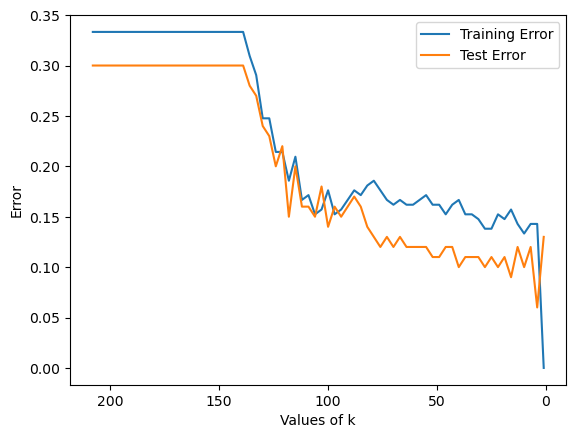

In [37]:
# Classification using KNN on Vertebral Column Data Set:
# Question Part c ii
# Plot train and test errors in terms of k

plt.plot(*zip(*sorted(errorMapTrain.items())), label='Training Error')
plt.plot(*zip(*sorted(errorMapTest.items())), label = 'Test Error')
plt.gca().invert_xaxis()
plt.xlabel('Values of k')
plt.ylabel('Error')
plt.legend()
plt.show()

#### ii. Test Data

In [38]:
# Classification using KNN on Vertebral Column Data Set:
# Question Part c ii
# k∗ is the most suitable k among those values
# kStar = k*

def returnKeywithMinimumError(errorMap):
    return min(zip(errorMap.values(), errorMap.keys()))[1]

kStar = returnKeywithMinimumError(errorMapTest)
print('Optimal k = ', kStar)
print(errorMapTest[kStar])

Optimal k =  4
0.06000000000000005


In [39]:
# Classification using KNN on Vertebral Column Data Set:
# Question Part c ii
# Calculate the confusion matrix, true positive rate, true negative rate, precision,and F1-score when k=k∗

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

classifier = KClassifier(n_neighbors = kStar)
classifier.fit(trainingX,trainingY)
predictedY = classifier.predict(testX)
confusionMatrix = confusion_matrix(testY,predictedY)
tn, fp, fn, tp = confusionMatrix.ravel()
tnr = tn/(tn+fp)
tpr = tp/(tp+fn)


print('Confusion Matrix - \n', confusionMatrix)
print('True Positive Rate - ', tpr)
print('True Negative Rate - ', tnr)
print('Precision Score -', precision_score(testY,predictedY))
print('F1 Score - ', f1_score(testY,predictedY))

Confusion Matrix - 
 [[25  5]
 [ 1 69]]
True Positive Rate -  0.9857142857142858
True Negative Rate -  0.8333333333333334
Precision Score - 0.9324324324324325
F1 Score -  0.9583333333333333


#### iii. Learning Curve

In [40]:
# Classification using KNN on Vertebral Column Data Set:
# Question Part c iii
# Also, for each N, select the optimal k from a set starting from k= 1, increasing by 5

def KNearestNeighbors(trainee, classifier, N):
    
    trainingX = trainee.iloc[:,:-1]
    trainingY = trainee['class']
        
#     Best Error
    leastError = 1
#     Optimal K
    kStar = 1
    
    for k in range(1 + 5, N + 1, 5):
        
        classifier.n_neighbors = k
        classifier.fit(trainingX,trainingY)
        predicted_Y_Test = classifier.predict(testX)
        error = 1 - accuracy_score(testY,predicted_Y_Test)
        
        if error < leastError:
            leastError = error
            kStar = k
    
    classifier.n_neighbors = 1
    classifier.fit(trainingX,trainingY)
    predicted_Y = classifier.predict(testX)
    error_K = 1 - accuracy_score(testY,predicted_Y)
    
    if error_K < leastError and leastError - error_K > 0.005:
            return error_K,1
    
    return leastError,kStar

In [41]:
# for each N, select your training set by choosing the first floor of N/3 rows of Class 0 and the first floor of N− N/3
# rows of Class 1 in the training set you created in 1(b)iii
# Created a map for dictionary 
# best test error rate or learning curve 

from sklearn.neighbors import KNeighborsClassifier
import math
learningCurve=dict()

for i in range(10, 210 + 10, 10):
    
    trainClass0 = df1[:math.floor(i/3)]
    trainClass1 = df2[:math.floor(i-i/3)]
    finaltrainingData = pd.concat([trainClass0,trainClass1])
    leastError,kStar = KNearestNeighbors(finaltrainingData,KNeighborsClassifier(), i)
    learningCurve[i] = leastError

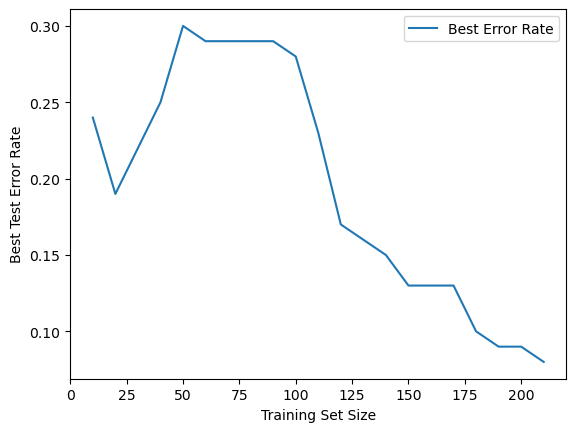

In [42]:
# Classification using KNN on Vertebral Column Data Set:
# Question Part c iii
# Plot the best test error rate

plt.plot(*zip(*sorted(learningCurve.items())), label='Best Error Rate')
plt.xlabel('Training Set Size')
plt.ylabel('Best Test Error Rate')
plt.legend()
plt.show()

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [43]:
# i) Minkowski Distance:
# Question Part d i A
# Manhattan Distance with p = 1

kNNManhattan = KClassifier(metric='manhattan')
bestErrorManhattan,kStarManhattan = KNearestNeighbors(trainingSet,kNNManhattan,196)
kNNManhattan.n_neighbors = kStarManhattan
print('Best K Manhattan =', kStarManhattan)
print('Best Error Manhattan =', bestErrorManhattan)

Best K Manhattan = 6
Best Error Manhattan = 0.10999999999999999


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [44]:
# i) Minkowski Distance:
# Question Part d i B
# Use the k∗ for the Manhattan distance in 1(d)iA. What is the best log10(p)

def returnKeywithMinimumError(errorMap):
    return min(zip(errorMap.values(), errorMap.keys()))[1]

errorMap = dict()

for i in range(1,11):
    pValue = 10**(0.1*i)
    classifier = KClassifier(metric='minkowski',p= pValue, n_neighbors = kStarManhattan)
    classifier.fit(trainingX, trainingY)
    predicted_Y = classifier.predict(testX)
    errorMap[pValue] = 1-accuracy_score(testY, predicted_Y)
    

bestPValue = returnKeywithMinimumError(errorMap)
bestErrorMinkowski = errorMap[bestPValue]
# for k, v in errorMap.items():
#     print(k, ': ',v)

print('Best log10(p)=',math.log(bestPValue,10))
print('Best Error Minkowski =', bestErrorMinkowski)

Best log10(p)= 0.6000000000000001
Best Error Minkowski = 0.06000000000000005


##### C. Chebyshev Distance With p -> infinity.

In [45]:
# i) Minkowski Distance:
# Question Part d i B

kNNChebyshev = KClassifier(metric='chebyshev')
bestErrorChebyshev,kStarChebyshev = KNearestNeighbors(trainingSet,kNNChebyshev,196)
kNNChebyshev.n_neighbors = kStarChebyshev

kNNChebyshev.fit(trainingX, trainingY)
print('Best K for Chebyshev =', kStarChebyshev)
print('Best Error Chebyshev =', bestErrorChebyshev)

Best K for Chebyshev = 16
Best Error Chebyshev = 0.07999999999999996


#### ii. Mahalanobis Distance.

In [46]:
# ii) Mahalanobis Distance
# Question Part d ii

cov_matrix = np.cov(trainingX.T)
#print(cov_matrix)
kNNMahalanobis = KClassifier(metric='mahalanobis',  metric_params={'VI': np.linalg.inv(cov_matrix)})
bestErrorMahalanobis,kStarMahalanobis = KNearestNeighbors(trainingSet,kNNMahalanobis,196)
kNNMahalanobis.n_neighbors = kStarMahalanobis
print('Best K Mahalanobis =', kStarMahalanobis)
print('Best Error Mahalanobis =', bestErrorMahalanobis)

Best K Mahalanobis = 6
Best Error Mahalanobis = 0.15000000000000002


In [47]:
!pip install prettytable

In [48]:
# Question part d) Summarize the test errors (when k=k∗) in a table. Use all of your training data and select the best k.
# Summarsing Table

from prettytable import PrettyTable
  
summary = PrettyTable(["Question Subpart", "Metric", "K Values", "P Values", "Best Error"])
  
# Add rows
summary.add_row(["d. i) A", "Manhattan", kStarManhattan, 1, bestErrorManhattan])
summary.add_row(["d. i) B", "Minkowski", kStarManhattan, bestPValue, bestErrorMinkowski])
summary.add_row(["d. i) C", "Chebyshev", kStarChebyshev, 'p tends to infinity',bestErrorChebyshev])
summary.add_row(["d ii)  ", "Mahanalobis", kStarMahalanobis, 'NA', bestErrorMahalanobis])

  
print(summary)

+------------------+-------------+----------+---------------------+---------------------+
| Question Subpart |    Metric   | K Values |       P Values      |      Best Error     |
+------------------+-------------+----------+---------------------+---------------------+
|     d. i) A      |  Manhattan  |    6     |          1          | 0.10999999999999999 |
|     d. i) B      |  Minkowski  |    6     |  3.981071705534973  | 0.06000000000000005 |
|     d. i) C      |  Chebyshev  |    16    | p tends to infinity | 0.07999999999999996 |
|     d ii)        | Mahanalobis |    6     |          NA         | 0.15000000000000002 |
+------------------+-------------+----------+---------------------+---------------------+


### (e) Weighted Decision

In [49]:
# Question part e
# Euclidean -  report the best test errors

weightedClassifierEuclidean = KClassifier(weights='distance')
bestErrorWeightedEuclidean,kStarWeightedEuclidean = KNearestNeighbors(trainingSet,weightedClassifierEuclidean,196)
weightedClassifierEuclidean.n_neighbors = kStarWeightedEuclidean
print('Best k for Weighted Euclidean : ',kStarWeightedEuclidean)
print('Best Test Error : ',bestErrorWeightedEuclidean)

Best k for Weighted Euclidean :  6
Best Test Error :  0.09999999999999998


In [50]:
# Question part e
# Manhattan -  report the best test errors

weightedClassifierManhattan = KClassifier(metric ='manhattan', weights='distance')
bestErrorWeightedManhattan,kStarWeightedManhattan = KNearestNeighbors(trainingSet,weightedClassifierManhattan,196)
weightedClassifierManhattan.n_neighbors = kStarWeightedManhattan
print('Best k for Weighted Manhattan: ',kStarWeightedManhattan)
print('Best Test Error : ',bestErrorWeightedManhattan)

Best k for Weighted Manhattan:  26
Best Test Error :  0.09999999999999998


In [51]:
# Question part e
# Chebyshev -  report the best test errors

weightedClassifierChebyshev = KClassifier(metric ='chebyshev', weights='distance')
bestErrorWeightedChebyshev,kStarWeightedChebyshev = KNearestNeighbors(trainingSet,weightedClassifierChebyshev,196)
weightedClassifierChebyshev.n_neighbors = kStarWeightedChebyshev
print('Best k for Weighted Chebyshev: ',kStarWeightedChebyshev)
print('Best Test Error : ',bestErrorWeightedChebyshev)

Best k for Weighted Chebyshev:  16
Best Test Error :  0.10999999999999999


### (f) Training Error Rate

When k is equal to 1 the data point will consider itself as its closest neighbor and hence will return answer with 100% accuracy and zero error rate

In [52]:
# Question part f
# The lowest training error rate you achieved in this homework


kForMinimumTrainingError = returnKeywithMinimumError(errorMapTrain)
print(kForMinimumTrainingError)
print(errorMapTrain[kForMinimumTrainingError])

1
0.0
